In [1]:
from frgpascal.analysis.processing import load_all
import matplotlib.pyplot as plt
from pathlib import Path
import json # load maestro logs
import pandas as pd
import numpy as np

In [2]:
# load a csv file

path = 'data/20221011_B9-char_1/'
metrics = pd.read_csv(path + 'fitted_characterization_metrics.csv')
metrics

,Unnamed: 0,pl_intensity_0,pl_peakev_0,pl_fwhm_0,t_bandgap_0,t_samplepresent_0,df_median_0,bf_inhomogeneity_0,name
0,sample0,174.176938,1.677392,0.096823,NaN,True,140.03584,0.154434,sample0
1,sample1,175.216607,1.676216,0.098287,NaN,True,140.84517,0.034818,sample1
2,sample2,253.082279,1.677381,0.097397,NaN,True,140.30478,0.033021,sample2
3,sample3,183.368298,1.677104,0.097168,1.764107,True,139.91630,0.036609,sample3
4,sample4,279.598707,1.677065,0.096425,NaN,True,140.98710,0.031844,sample4
5,sample5,210.086825,1.676960,0.095493,1.854573,True,140.95224,0.123810,sample5
6,sample6,235.359654,1.677107,0.096805,NaN,True,141.80391,0.032335,sample6
7,sample7,160.327952,1.676423,0.096087,1.844298,True,141.10165,0.034108,sample7
8,sample8,176.236739,1.676698,0.098563,NaN,True,140.71817,0.052047,sample8
9,sample9,83.560557,1.677186,0.101346,NaN,True,140.06075,0.036251,sample9


Text(0.5, 0, 'pl_peakev_0')

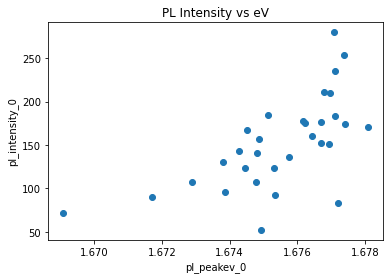

In [3]:
plt.title('PL Intensity vs eV')
plt.scatter(metrics['pl_peakev_0'], metrics['pl_intensity_0'])
plt.ylabel('pl_intensity_0')
plt.xlabel('pl_peakev_0')

Text(0.5, 0, 'Sample Number')

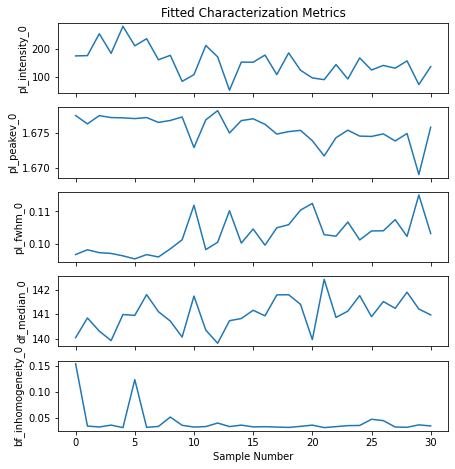

In [4]:
# visualize the change in metrics over time
# note a line graph only makes sense if the samples are indeed sequential

columns = ['pl_intensity_0', 'pl_peakev_0', 'pl_fwhm_0', 'df_median_0', 'bf_inhomogeneity_0']
nrows=len(columns)

fig, ax = plt.subplots(nrows=nrows, ncols=1, sharex=True, figsize=(7,nrows*1.5))
ax[0].set_title('Fitted Characterization Metrics')

for i in range(nrows):
    plt.subplot(nrows,1,i+1)
    plt.ylabel(columns[i])
    plt.plot(metrics[columns[i]])
plt.xlabel('Sample Number')

In [5]:
from natsort import index_natsorted

def load_all_sorted(chardir):
	metricdf, rawdf = load_all(
		chardir,
		t_kwargs=dict(
			wlmin=700,
			wlmax=900
		)
	)
	rawdf= rawdf.sort_values(
   		by='name',
   		key=lambda x: np.argsort(index_natsorted(rawdf['name']))
    )
	rawdf = rawdf.reset_index(drop=True)


	metricdf= metricdf.sort_values(
    	by='name',
    	key=lambda x: np.argsort(index_natsorted(metricdf['name']))
    )
	metricdf = metricdf.reset_index(drop=True)
	return metricdf, rawdf

In [15]:
chardir_0 = 'data/20221011_B9-char_1/Characterization/'
metricdf, rawdf = load_all_sorted(chardir_0)

Loading data:   0%|          | 0/31 [00:00<?, ?sample/s]/home/kcw/anaconda3/lib/python3.9/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: invalid value encountered in log10
  a = -np.log10(t)
Loading data:  13%|█▎        | 4/31 [00:03<00:22,  1.19sample/s]/home/kcw/anaconda3/lib/python3.9/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: divide by zero encountered in log10
  a = -np.log10(t)
Loading data: 100%|██████████| 31/31 [00:24<00:00,  1.27sample/s]


In [31]:
metricdf.columns

Index(['pl_intensity_0', 'pl_peakev_0', 'pl_fwhm_0', 't_bandgap_0',
       't_samplepresent_0', 'df_median_0', 'bf_inhomogeneity_0', 'name'],
      dtype='object')

In [62]:
# determine what type of data
for c in rawdf.columns:
    print(c, type(rawdf[c][0]))
print('pl_0 keys: ' + str(rawdf['pl_0'][0].keys()))
print('t_0 keys: ' + str(rawdf['t_0'][0].keys()))
print('df_0 shape: ' + str(rawdf['df_0'][0].shape))
print('bf_0 shape: ' + str(rawdf['bf_0'][0].shape))
print('plimg_0 shape: ' + str(rawdf['plimg_0'][0].shape))

rawdf.head(1)

pl_0 <class 'dict'>
t_0 <class 'dict'>
df_0 <class 'numpy.ndarray'>
bf_0 <class 'numpy.ndarray'>
plimg_0 <class 'numpy.ndarray'>
name <class 'str'>
pl_0 keys: dict_keys(['wl', 'cps'])
t_0 keys: dict_keys(['wl', 't', 'a'])
df_0 shape: (1080, 1440, 3)
bf_0 shape: (1080, 1440, 3)
plimg_0 shape: (1080, 1440, 3)


,pl_0,t_0,df_0,bf_0,plimg_0,name
0,"{'wl': [178.95, 179.38, 179.8, 180.23, 180.65,...","{'wl': [179.38, 179.8, 180.23, 180.65, 181.08,...","[[[96.16787, 57.04131, 0.0], [96.99463, 56.334...","[[[0.6191406, 0.53027344, 0.6425781], [0.59277...","[[[0.81152344, 0.61328125, 0.0], [0.85058594, ...",sample0


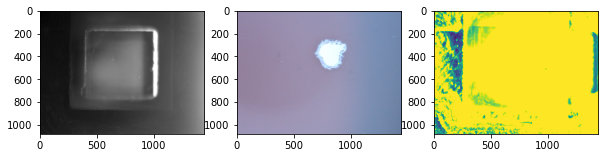

In [114]:
# plot images

fig, ax = plt.subplots(1,3, figsize=(10,10))
i=0

ax[0].imshow(rawdf['df_0'][i][:,:,0], cmap='gray')
ax[1].imshow(rawdf['bf_0'][i])
ax[2].imshow(rawdf['plimg_0'][i][:,:,0]) # use red channel for PL measurements, since that's what bandgap energy is